<a href="https://colab.research.google.com/github/esterna25/McDonaldsMenu/blob/main/McDonaldsMenu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nutrition Facts for McDonald's Menu**

**Project Overview**

The project involves conducting a comprehensive nutritional analysis of McDonald's menu items. The analysis will highlight any trends or patterns in nutritional content across different categories of menu items, which can inform recommendations for healthier menu options or improvements in ingredient selection.

**Objectives**

The main objectives of this project are:

1. **Average Caloric Content**: Determining the average calorie count per meal across McDonald's menu items to assess typical calorie intake.
   
2. **Contribution of Drinks**: Analyzing the contribution of beverages like soda, coffee, and tea to the overall calorie intake, highlighting their impact on daily nutritional values.
   
3. **Grilled vs. Crispy Chicken**: Assessing whether substituting grilled chicken for crispy chicken in sandwiches enhances the nutritional value by comparing calorie, fat, and protein content.
   
4. **Egg Whites vs. Whole Eggs**: Investigating whether opting for egg whites instead of whole eggs alters the nutritional profile, particularly focusing on protein and cholesterol levels.
   
5. **Minimum Nutritional Requirements**: Identifying the smallest portion sizes available on the menu that meet daily nutritional needs, considering calorie intake, protein, fiber, vitamins, and minerals.
   
6. **Dietary Fiber Analysis**: Exploring the dietary fiber content across menu items and comparing nutritional aspects related to fiber intake for digestive health.

Through these inquiries, the analysis seeks to offer a comprehensive view of the nutritional implications of McDonald's menu choices, aiding consumers in making informed decisions about their dietary preferences and health goals.

### **Step by step**

## **1. Data Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Project Ester/MCD/menu_mcd.csv')
data

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6


In [ ]:
# Create data set info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

## **2. Data Cleaning**

In [ ]:
# Remove any columns with all NaN values
data.dropna(how='all', axis=1, inplace=True)

## **3. Exploration Data Analysis (EDA)**

In [ ]:
data.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


Category
Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: count, dtype: int64


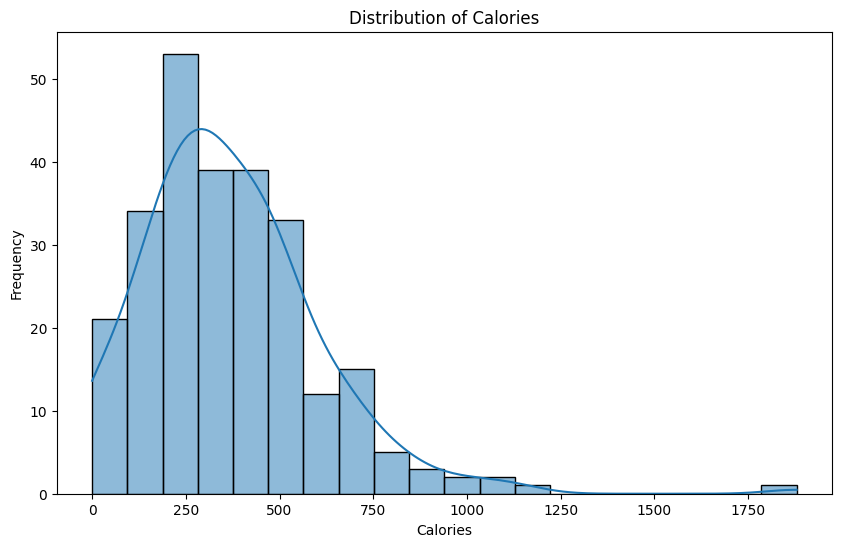

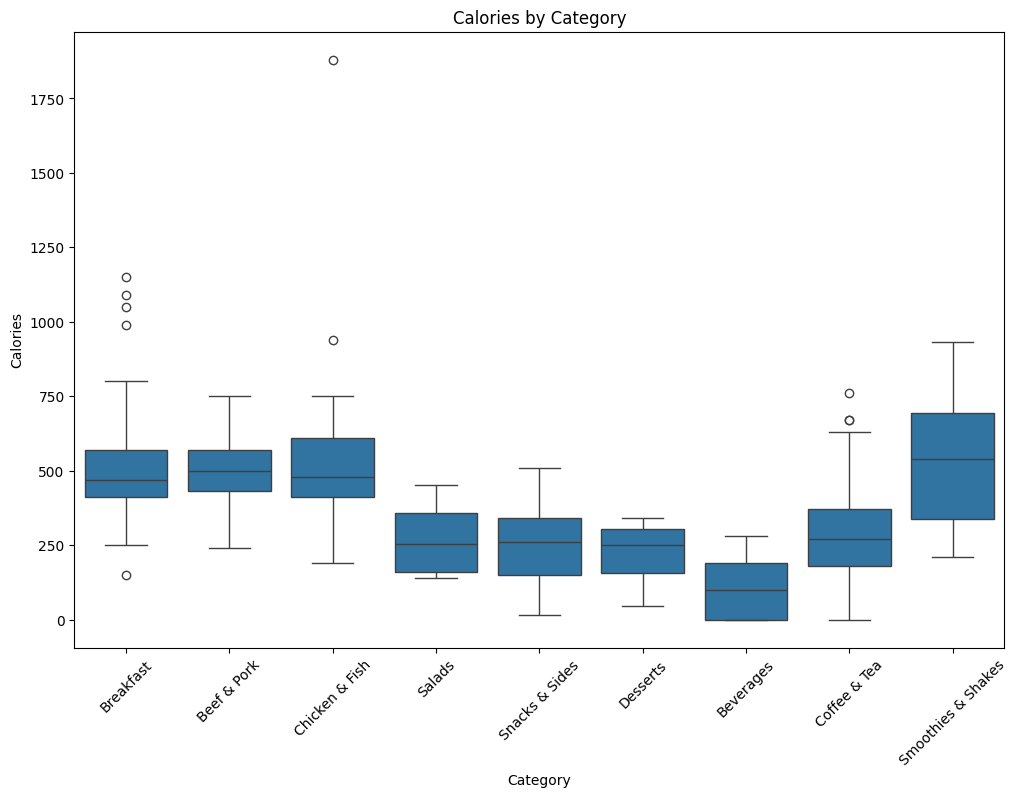

In [ ]:
# Frequency counts for categories
print(data['Category'].value_counts())

# Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(data['Calories'], bins=20, kde=True)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

# Comparing nutritional values across items
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Calories', data=data)
plt.title('Calories by Category')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Check all menu categories in the data
data['Category'].unique()

array(['Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads',
       'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea',
       'Smoothies & Shakes'], dtype=object)

All items in the data set are grouped based on 9 categories, namely 'Breakfast', 'Beef & Pork', 'Chicken & Fish', 'Salads', 'Snacks & Sides', 'Desserts', 'Beverages', 'Coffee & Tea' , 'Smoothies & Shakes'.

### Question 1: How many calories does the average McDonald's meal contain?

In [ ]:
#Rata-rata kalori pada setiap kategori menu
brkf = data.loc[data.Category == 'Breakfast']
bnp = data.loc[data.Category == 'Beef & Pork']
cnf = data.loc[data.Category == 'Chicken & Fish']
sld = data.loc[data.Category == 'Salads']
snass = data.loc[data.Category == 'Snacks & Sides']
dess = data.loc[data.Category == 'Desserts']
bev = data.loc[data.Category == 'Beverages']
cnt = data.loc[data.Category == 'Coffee & Tea']
ss = data.loc[data.Category == 'Smoothies & Shakes']

#Rata-rata kalori pada setiap kategori menu McDonald's
print('Average calories in Breakfast:', brkf['Calories'].mean())
print('Average calories in Beef & Pork:', bnp['Calories'].mean())
print('Average calories in Chicken & Fish:', cnf['Calories'].mean())
print('Average calories in Salads:', sld['Calories'].mean())
print('Average calories in Snacks & Sides:', snass['Calories'].mean())
print('Average calories in Desserts:', dess['Calories'].mean())
print('Average calories in Beverages:', bev['Calories'].mean())
print('Average calories in Coffee & Tea:', cnt['Calories'].mean())
print('Average calories in Smoothies & Shakes:', ss['Calories'].mean())

Average calories in Breakfast: 526.6666666666666
Average calories in Beef & Pork: 494.0
Average calories in Chicken & Fish: 552.9629629629629
Average calories in Salads: 270.0
Average calories in Snacks & Sides: 245.76923076923077
Average calories in Desserts: 222.14285714285714
Average calories in Beverages: 113.70370370370371
Average calories in Coffee & Tea: 283.89473684210526
Average calories in Smoothies & Shakes: 531.4285714285714


In [ ]:
# Can be made neater into the table by creating a new dataframe
data2 = data[['Calories']].groupby(data['Category']).mean().reset_index()
data2

,Category,Calories
0,Beef & Pork,494.000000
1,Beverages,113.703704
2,Breakfast,526.666667
3,Chicken & Fish,552.962963
4,Coffee & Tea,283.894737
5,Desserts,222.142857
6,Salads,270.000000
7,Smoothies & Shakes,531.428571
8,Snacks & Sides,245.769231


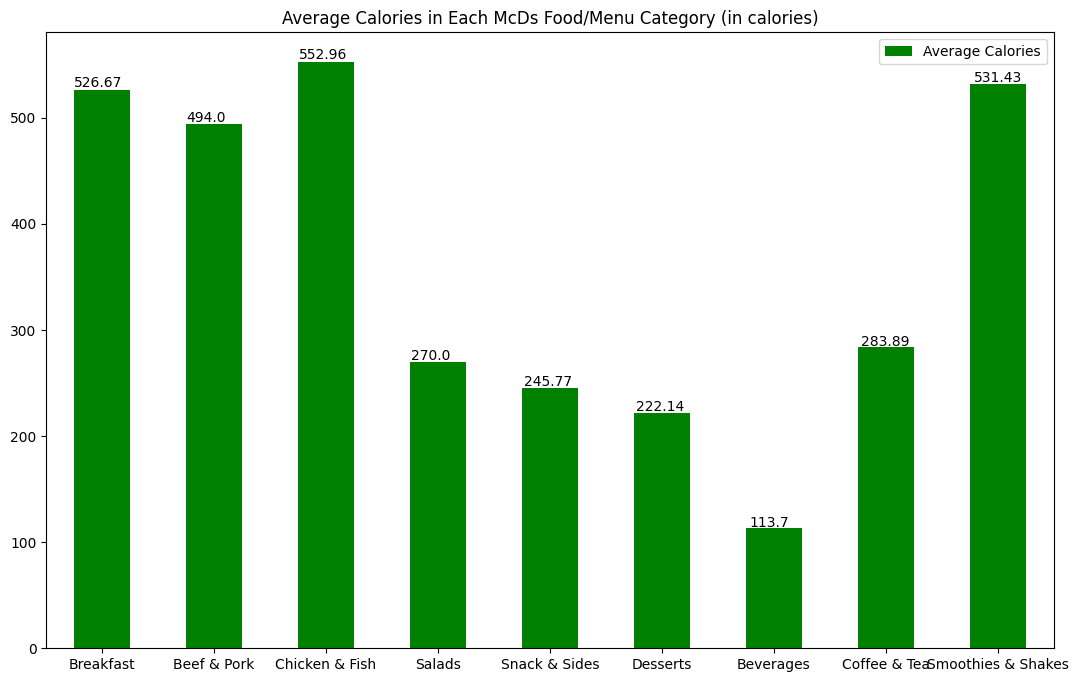

In [ ]:
avg_cat = [round(brkf['Calories'].mean(axis=0), 2), round(bnp['Calories'].mean(axis=0), 2),
          round(cnf['Calories'].mean(axis=0), 2), round(sld['Calories'].mean(axis=0), 2),
          round(snass['Calories'].mean(axis=0), 2), round(dess['Calories'].mean(axis=0), 2),
          round(bev['Calories'].mean(axis=0), 2), round(cnt['Calories'].mean(axis=0), 2),
          round(ss['Calories'].mean(axis=0), 2)]


index = ['Breakfast','Beef & Pork','Chicken & Fish','Salads','Snack & Sides','Desserts','Beverages','Coffee & Tea',
        'Smoothies & Shakes']

avg_calat = pd.DataFrame({'Average Calories':avg_cat}, index=index)
ax = avg_calat.plot.bar(rot=0, color='green', figsize=(13,8),
                       title='Average Calories in Each McDs Food/Menu Category (in calories)', legend=True)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

In [ ]:
# Overall average
data['Calories'].mean()

368.2692307692308

So the conclusion to the first question is that the average calories for all McDonald's menu items is 368.2692307692308 calories. Apart from that, we also have average calories for each category which can be seen in the bar graph above. From these results, Chicken & Fish has the highest average calories.

### Question 2: How much do drinks, such as soda or coffee & tea, contribute to overall calorie intake?

In [ ]:
# Take data of soft drinks
data_soda = data[data['Category']=='Beverages']
data_soda

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
110,Beverages,Coca-Cola Classic (Small),16 fl oz cup,140,0,0.0,0,0.0,0,0.0,...,39,13,0,0,39,0,0,0,0,0
111,Beverages,Coca-Cola Classic (Medium),21 fl oz cup,200,0,0.0,0,0.0,0,0.0,...,55,18,0,0,55,0,0,0,0,0
112,Beverages,Coca-Cola Classic (Large),30 fl oz cup,280,0,0.0,0,0.0,0,0.0,...,76,25,0,0,76,0,0,0,0,0
113,Beverages,Coca-Cola Classic (Child),12 fl oz cup,100,0,0.0,0,0.0,0,0.0,...,28,9,0,0,28,0,0,0,0,0
114,Beverages,Diet Coke (Small),16 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
115,Beverages,Diet Coke (Medium),21 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
116,Beverages,Diet Coke (Large),30 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
117,Beverages,Diet Coke (Child),12 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
118,Beverages,Dr Pepper (Small),16 fl oz cup,140,0,0.0,0,0.0,0,0.0,...,37,12,0,0,35,0,0,0,0,0
119,Beverages,Dr Pepper (Medium),21 fl oz cup,190,0,0.0,0,0.0,0,0.0,...,53,18,0,0,51,0,0,0,0,0


In [ ]:
# Take data of Coffee
data_coffee = data[data['Category']=='Coffee & Tea']
data_coffee

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
137,Coffee & Tea,Iced Tea (Small),16 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
138,Coffee & Tea,Iced Tea (Medium),21 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
139,Coffee & Tea,Iced Tea (Large),30 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
140,Coffee & Tea,Iced Tea (Child),12 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
141,Coffee & Tea,Sweet Tea (Small),16 fl oz cup,150,0,0.0,0,0.0,0,0.0,...,36,12,0,0,36,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,Coffee & Tea,Frappé Caramel (Medium),16 fl oz cup,550,200,23.0,35,15.0,73,1.0,...,79,26,0,0,71,9,20,0,30,2
228,Coffee & Tea,Frappé Caramel (Large),22 fl oz cup,670,250,27.0,42,17.0,87,1.5,...,96,32,0,0,88,11,20,0,35,2
229,Coffee & Tea,Frappé Chocolate Chip (Small),12 fl oz cup,530,200,23.0,35,14.0,72,1.0,...,76,25,1,5,67,8,15,0,25,4
230,Coffee & Tea,Frappé Chocolate Chip (Medium),16 fl oz cup,630,240,26.0,41,17.0,85,1.0,...,91,30,1,5,81,9,15,0,30,4


In [ ]:
# Overall calories intake
total_cal = data["Calories"].sum()
print(total_cal)

95750


**Soft Drinks**

In [ ]:
# Count the calories in Soft Drinks
totalsoft_cal = data_soda['Calories'].sum()
print(totalsoft_cal)

3070


In [ ]:
# Calculate the percentage of calories in Soft Drinks
totalsoft_cal/total_cal*100

3.2062663185378595

**Coffee**

In [ ]:
# Count the calories in Coffee
totalcoffee_cal = data_coffee['Calories'].sum()
print(totalcoffee_cal)

26970


In [ ]:
# Calculate the percentage of calories in Coffee
totalcoffee_cal/total_cal*100

28.167101827676237

**Average calories of soda drinks and coffee**

In [ ]:
# Average calories of Soft Drinks
ratarata_soft_cal = data_soda['Calories'].mean()
print(ratarata_soft_cal)

113.70370370370371


In [ ]:
# Average calories of Coffee
ratarata_coffee_cal = data_coffee['Calories'].mean()
print(ratarata_coffee_cal)

283.89473684210526


In [ ]:
# Calculate the percentage difference
percentage_difference = ((ratarata_coffee_cal - ratarata_soft_cal) / ratarata_soft_cal) * 100
percentage_difference

149.67941025201438

From the calculation results above, we can see that coffee and tea contribute more calories than soda with a difference of ~149.67%

### Question 3: Does the grilled chicken ordered in place of the crispy chicken increase the nutritional value of the sandwich?

In [ ]:
# Take data of Sandwich
data_sandwich = data[data['Category']=='Chicken & Fish']
data_sandwich

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
57,Chicken & Fish,Premium Crispy Chicken Classic Sandwich,7.5 oz (213 g),510,200,22.0,33,3.5,18,0.0,...,55,18,3,13,10,24,4,6,15,20
58,Chicken & Fish,Premium Grilled Chicken Classic Sandwich,7 oz (200 g),350,80,9.0,13,2.0,9,0.0,...,42,14,3,13,8,28,4,8,15,20
59,Chicken & Fish,Premium Crispy Chicken Club Sandwich,8.8 oz (249 g),670,300,33.0,51,9.0,44,0.0,...,58,19,3,14,11,36,8,20,30,20
60,Chicken & Fish,Premium Grilled Chicken Club Sandwich,8.3 oz (235 g),510,180,20.0,31,7.0,36,0.0,...,44,15,3,13,9,40,8,20,30,20
61,Chicken & Fish,Premium Crispy Chicken Ranch BLT Sandwich,8.1 oz (230 g),610,250,28.0,43,6.0,31,0.0,...,57,19,3,13,11,32,4,20,15,20
62,Chicken & Fish,Premium Grilled Chicken Ranch BLT Sandwich,7.6 oz (217 g),450,130,15.0,23,4.5,22,0.0,...,43,14,3,13,9,36,4,20,15,20
63,Chicken & Fish,Bacon Clubhouse Crispy Chicken Sandwich,10 oz (284 g),750,340,38.0,59,10.0,51,0.5,...,65,22,4,15,16,36,8,25,30,15
64,Chicken & Fish,Bacon Clubhouse Grilled Chicken Sandwich,9.5 oz (270 g),590,230,25.0,39,8.0,42,0.0,...,51,17,4,15,14,40,8,30,30,15
65,Chicken & Fish,Southern Style Crispy Chicken Sandwich,5.6 oz (160 g),430,170,19.0,29,3.0,15,0.0,...,43,14,2,7,7,21,4,2,15,15
66,Chicken & Fish,McChicken,5.1 oz (143 g),360,140,16.0,25,3.0,15,0.0,...,40,13,2,7,5,14,0,2,10,15


**Grouping between Crispy Chicken and Grilled Chicken**

In [ ]:
# Grouping crispy chicken
data_sandwich_crispy_chicken = data_sandwich[data_sandwich['Item'].str.contains('Crispy')]
data_sandwich_crispy_chicken

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
57,Chicken & Fish,Premium Crispy Chicken Classic Sandwich,7.5 oz (213 g),510,200,22.0,33,3.5,18,0.0,...,55,18,3,13,10,24,4,6,15,20
59,Chicken & Fish,Premium Crispy Chicken Club Sandwich,8.8 oz (249 g),670,300,33.0,51,9.0,44,0.0,...,58,19,3,14,11,36,8,20,30,20
61,Chicken & Fish,Premium Crispy Chicken Ranch BLT Sandwich,8.1 oz (230 g),610,250,28.0,43,6.0,31,0.0,...,57,19,3,13,11,32,4,20,15,20
63,Chicken & Fish,Bacon Clubhouse Crispy Chicken Sandwich,10 oz (284 g),750,340,38.0,59,10.0,51,0.5,...,65,22,4,15,16,36,8,25,30,15
65,Chicken & Fish,Southern Style Crispy Chicken Sandwich,5.6 oz (160 g),430,170,19.0,29,3.0,15,0.0,...,43,14,2,7,7,21,4,2,15,15
70,Chicken & Fish,Premium McWrap Chicken & Bacon (Crispy Chicken),11.1 oz (316 g),630,280,32.0,49,9.0,45,0.5,...,56,19,3,13,7,32,60,20,20,20
72,Chicken & Fish,Premium McWrap Chicken & Ranch (Crispy Chicken),10.9 oz (310 g),610,280,31.0,47,8.0,40,0.5,...,56,19,3,14,8,27,60,15,20,20
74,Chicken & Fish,Premium McWrap Southwest Chicken (Crispy Chicken),11.1 oz (314 g),670,300,33.0,51,8.0,40,0.5,...,68,23,5,19,12,27,60,15,20,20
76,Chicken & Fish,Premium McWrap Chicken Sweet Chili (Crispy Chi...,10.7 oz (304 g),540,200,23.0,35,4.5,23,0.0,...,61,20,3,13,14,23,60,15,8,20


In [ ]:
# Grouping grilled chicken
data_sandwich_grilled_chicken = data_sandwich[data_sandwich['Item'].str.contains('Grilled')]
data_sandwich_grilled_chicken

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
58,Chicken & Fish,Premium Grilled Chicken Classic Sandwich,7 oz (200 g),350,80,9.0,13,2.0,9,0.0,...,42,14,3,13,8,28,4,8,15,20
60,Chicken & Fish,Premium Grilled Chicken Club Sandwich,8.3 oz (235 g),510,180,20.0,31,7.0,36,0.0,...,44,15,3,13,9,40,8,20,30,20
62,Chicken & Fish,Premium Grilled Chicken Ranch BLT Sandwich,7.6 oz (217 g),450,130,15.0,23,4.5,22,0.0,...,43,14,3,13,9,36,4,20,15,20
64,Chicken & Fish,Bacon Clubhouse Grilled Chicken Sandwich,9.5 oz (270 g),590,230,25.0,39,8.0,42,0.0,...,51,17,4,15,14,40,8,30,30,15
71,Chicken & Fish,Premium McWrap Chicken & Bacon (Grilled Chicken),10.7 oz (302 g),480,170,19.0,28,7.0,36,0.0,...,42,14,3,13,6,36,60,25,20,20
73,Chicken & Fish,Premium McWrap Chicken & Ranch (Grilled Chicken),10.5 oz (297 g),450,160,18.0,27,6.0,31,0.5,...,42,14,3,14,6,30,60,15,15,20
75,Chicken & Fish,Premium McWrap Southwest Chicken (Grilled Chic...,11.2 oz (318 g),520,180,20.0,31,6.0,32,0.0,...,55,18,5,20,10,31,70,15,20,20
77,Chicken & Fish,Premium McWrap Chicken Sweet Chili (Grilled Ch...,10.3 oz (291 g),380,90,10.0,15,3.0,14,0.0,...,47,16,3,13,12,27,60,15,8,20


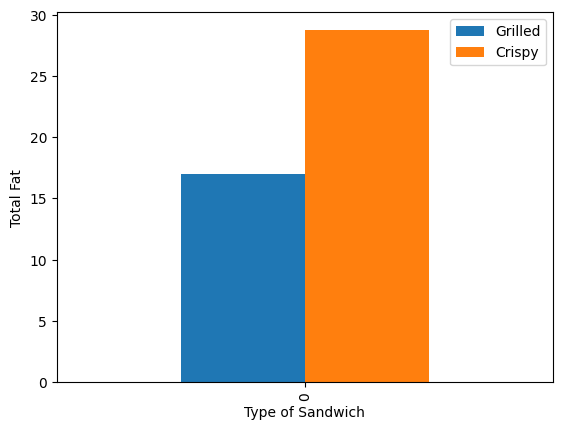

Does Grilled Chicken have higher fat than Crispy Chicken?False


In [ ]:
# Analyze the comparison of crispy chicken sandwiches with grilled chicken sandwiches based on total fat (total fat)
data_sandwich_fat = pd.DataFrame({'Grilled':
                                     [data_sandwich_grilled_chicken['Total Fat'].mean()],'Crispy':
                                    [data_sandwich_crispy_chicken['Total Fat'].mean()]})
data_sandwich_fat.plot.bar()
plt.ylabel('Total Fat')
plt.xlabel('Type of Sandwich')
plt.show()

print('Does Grilled Chicken have higher fat than Crispy Chicken?'+
     str(data_sandwich_grilled_chicken['Total Fat'].mean()>data_sandwich_crispy_chicken['Total Fat'].mean()))

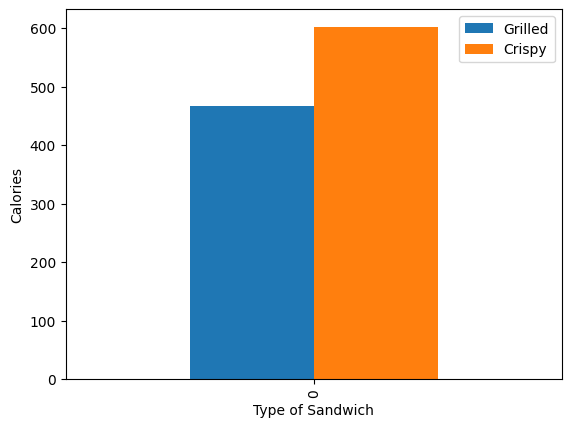

Does Grilled Chicken have higher calories than Crispy Chicken?False


In [ ]:
# Analyze the comparison between crispy chicken sandwiches and grilled chicken sandwiches based on calories
data_sandwich_cal = pd.DataFrame({'Grilled':
                                     [data_sandwich_grilled_chicken['Calories'].mean()],'Crispy':
                                    [data_sandwich_crispy_chicken['Calories'].mean()]})
data_sandwich_cal.plot.bar()
plt.ylabel('Calories')
plt.xlabel('Type of Sandwich')
plt.show()

print('Does Grilled Chicken have higher calories than Crispy Chicken?'+
     str(data_sandwich_grilled_chicken['Calories'].mean()>data_sandwich_crispy_chicken['Calories'].mean()))

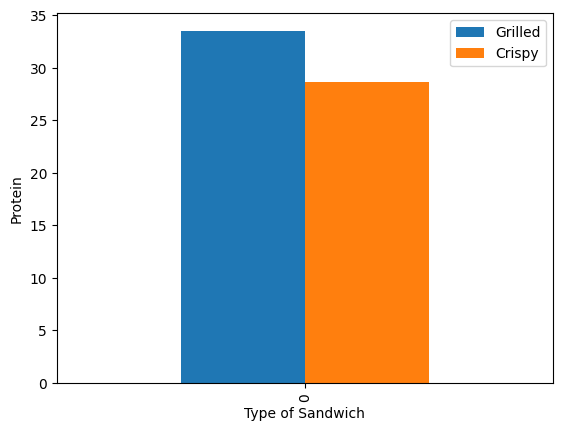

Does Grilled Chicken have higher protein than Crispy Chicken?True


In [ ]:
# Analyze the comparison between crispy chicken sandwiches and grilled chicken sandwiches based on protein
data_sandwich_pro = pd.DataFrame({'Grilled':
                                     [data_sandwich_grilled_chicken['Protein'].mean()],'Crispy':
                                    [data_sandwich_crispy_chicken['Protein'].mean()]})
data_sandwich_pro.plot.bar()
plt.ylabel('Protein')
plt.xlabel('Type of Sandwich')
plt.show()

print('Does Grilled Chicken have higher protein than Crispy Chicken?'+
     str(data_sandwich_grilled_chicken['Protein'].mean()>data_sandwich_crispy_chicken['Protein'].mean()))

The conclusion for this third question is that in terms of calories and total fat, Crispy Chicken has a higher value compared to Grilled Chicken, but in terms of protein, Grilled Chicken is superior to Crispy Chicken.

### Question 4: What about ordering egg whites instead of whole eggs?

In [ ]:
# Step 1 - Take data related to eggs
data_egg = data[data['Item'].str.contains('Egg')]
data_egg

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
5,Breakfast,Steak & Egg McMuffin,6.5 oz (185 g),430,210,23.0,36,9.0,46,1.0,...,31,10,4,18,3,26,15,2,30,20
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460,230,26.0,40,13.0,65,0.0,...,38,13,2,7,3,19,10,8,15,15
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520,270,30.0,47,14.0,68,0.0,...,43,14,3,12,4,19,15,8,20,20
8,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",5.4 oz (153 g),410,180,20.0,32,11.0,56,0.0,...,36,12,2,7,3,20,2,8,15,10
9,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",5.9 oz (167 g),470,220,25.0,38,12.0,59,0.0,...,42,14,3,12,4,20,6,8,15,15
12,Breakfast,Sausage Biscuit with Egg (Regular Biscuit),5.7 oz (163 g),510,290,33.0,50,14.0,71,0.0,...,36,12,2,6,2,18,6,0,10,20


In [ ]:
#Step 2 - Takes data related to Egg Whites
data_white_egg = data[data['Item'].str.contains('White')]
data_white_egg

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
8,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (R...",5.4 oz (153 g),410,180,20.0,32,11.0,56,0.0,...,36,12,2,7,3,20,2,8,15,10
9,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (L...",5.9 oz (167 g),470,220,25.0,38,12.0,59,0.0,...,42,14,3,12,4,20,6,8,15,15
14,Breakfast,Sausage Biscuit with Egg Whites (Regular Biscuit),5.9 oz (167 g),460,250,27.0,42,12.0,62,0.0,...,34,11,2,6,3,18,0,0,8,15
15,Breakfast,Sausage Biscuit with Egg Whites (Large Biscuit),6.4 oz (181 g),520,280,32.0,49,13.0,65,0.0,...,40,13,3,11,3,18,4,0,8,15
20,Breakfast,"Bacon, Egg & Cheese McGriddles with Egg Whites",6.3 oz (178 g),400,140,15.0,24,7.0,34,0.0,...,47,16,2,9,16,20,2,10,15,10
23,Breakfast,"Sausage, Egg & Cheese McGriddles with Egg Whites",7.2 oz (205 g),500,230,26.0,40,10.0,52,0.0,...,46,15,2,9,15,21,2,0,20,10
25,Breakfast,"Bacon, Egg & Cheese Bagel with Egg Whites",7.1 oz (201 g),570,230,25.0,39,9.0,45,0.5,...,55,18,3,12,8,30,10,15,20,15
29,Breakfast,Big Breakfast with Egg Whites (Regular Biscuit),9.6 oz (272 g),640,330,37.0,57,14.0,69,0.0,...,50,17,3,12,3,26,0,2,10,15


In [ ]:
# Step 3 - Take data related to Whole Egg
data_whole_egg = data_egg[~data['Item'].str.contains('White')]
data_whole_egg

<ipython-input-31-9cf1ddd2a966>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_whole_egg = data_egg[~data['Item'].str.contains('White')]


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
5,Breakfast,Steak & Egg McMuffin,6.5 oz (185 g),430,210,23.0,36,9.0,46,1.0,...,31,10,4,18,3,26,15,2,30,20
6,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",5.3 oz (150 g),460,230,26.0,40,13.0,65,0.0,...,38,13,2,7,3,19,10,8,15,15
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520,270,30.0,47,14.0,68,0.0,...,43,14,3,12,4,19,15,8,20,20
12,Breakfast,Sausage Biscuit with Egg (Regular Biscuit),5.7 oz (163 g),510,290,33.0,50,14.0,71,0.0,...,36,12,2,6,2,18,6,0,10,20
13,Breakfast,Sausage Biscuit with Egg (Large Biscuit),6.2 oz (177 g),570,330,37.0,57,15.0,74,0.0,...,42,14,3,11,3,18,10,0,10,20
18,Breakfast,Steak & Egg Biscuit (Regular Biscuit),7.1 oz (201 g),540,290,32.0,49,16.0,78,1.0,...,38,13,2,8,3,25,10,2,20,25
19,Breakfast,"Bacon, Egg & Cheese McGriddles",6.1 oz (174 g),460,190,21.0,32,9.0,44,0.0,...,48,16,2,9,15,19,10,10,20,15
22,Breakfast,"Sausage, Egg & Cheese McGriddles",7.1 oz (201 g),550,280,31.0,48,12.0,61,0.0,...,48,16,2,9,15,20,10,0,20,15


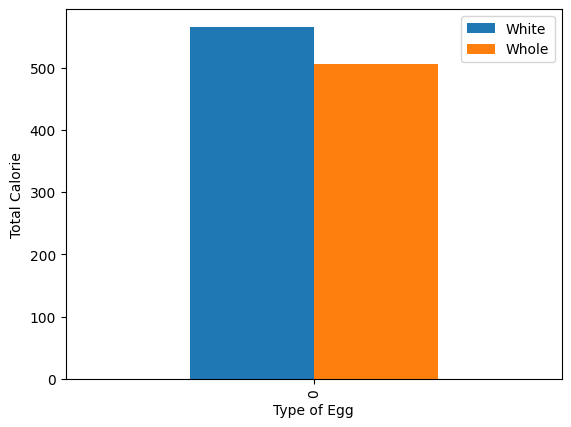

Does Egg Whites have a higher calories than Whole Eggs?True


In [ ]:
# Comparison of Calories between Egg Whites and Whole Eggs
data_egg_cal = pd.DataFrame({'White':
                               [data_white_egg['Calories'].mean()],
                               'Whole':
                               [data_whole_egg['Calories'].mean()]})
data_egg_cal.plot.bar()
plt.ylabel('Total Calorie')
plt.xlabel('Type of Egg')
plt.show()

print('Does Egg Whites have a higher calories than Whole Eggs?'+
     str(data_white_egg['Calories'].mean()>data_whole_egg['Calories'].mean()))

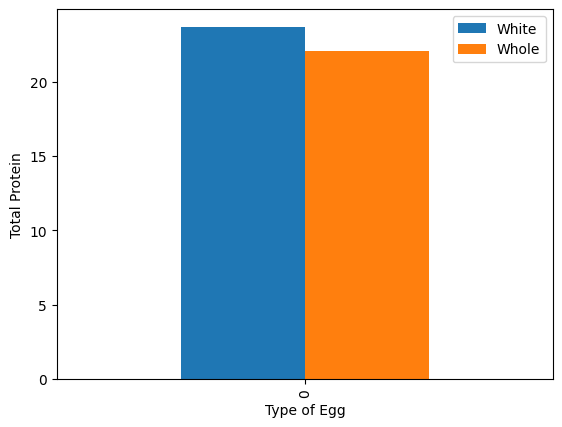

Does Egg Whites have a higher protein than Whole Eggs?True


In [ ]:
# Comparison of Protein between Egg Whites and Whole Eggs
data_egg_cal = pd.DataFrame({'White':
                               [data_white_egg['Protein'].mean()],
                               'Whole':
                               [data_whole_egg['Protein'].mean()]})
data_egg_cal.plot.bar()
plt.ylabel('Total Protein')
plt.xlabel('Type of Egg')
plt.show()

print('Does Egg Whites have a higher protein than Whole Eggs?'+
     str(data_white_egg['Protein'].mean()>data_whole_egg['Protein'].mean()))

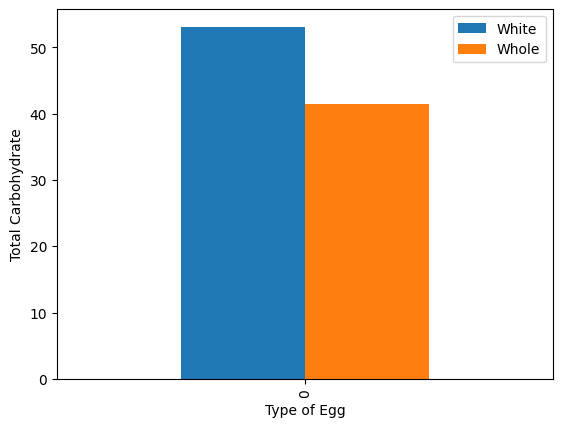

Does Egg Whites have a higher carbohydrate than Whole Eggs?True


In [ ]:
# Comparison of Carbohydrates between Egg Whites and Whole Eggs
data_egg_cal = pd.DataFrame({'White':
                               [data_white_egg['Carbohydrates'].mean()],
                               'Whole':
                               [data_whole_egg['Carbohydrates'].mean()]})
data_egg_cal.plot.bar()
plt.ylabel('Total Carbohydrate')
plt.xlabel('Type of Egg')
plt.show()

print('Does Egg Whites have a higher carbohydrate than Whole Eggs?'+
     str(data_white_egg['Carbohydrates'].mean()>data_whole_egg['Carbohydrates'].mean()))

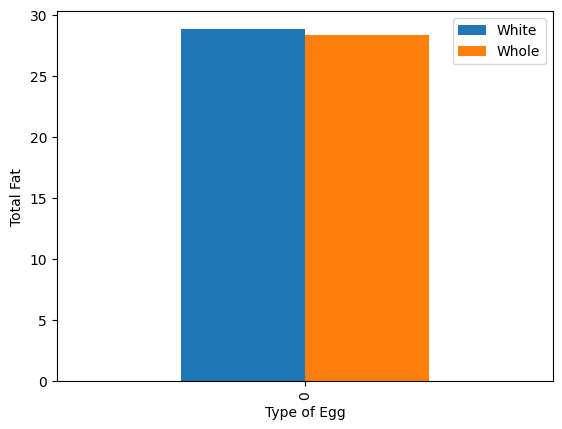

Putih telur memiliki kandungan lemak yang lebih tinggi dibandingkan dengan telur utuh?True


In [ ]:
# Comparison of Total Fat between Egg Whites and Whole Eggs
data_egg_cal = pd.DataFrame({'White':
                               [data_white_egg['Total Fat'].mean()],
                               'Whole':
                               [data_whole_egg['Total Fat'].mean()]})
data_egg_cal.plot.bar()
plt.ylabel('Total Fat')
plt.xlabel('Type of Egg')
plt.show()

print('Putih telur memiliki kandungan lemak yang lebih tinggi dibandingkan dengan telur utuh?'+
     str(data_white_egg['Total Fat'].mean()>data_whole_egg['Total Fat'].mean()))

For the fourth question, it can be concluded that White Eggs contain more calories, protein, carbohydrates and fat than Whole Eggs.

### Question 5: What is the smallest amount of food you can order from the menu to meet your nutritional needs for one day?

In this section I will provide a list of healthy McDonald's foods based on the Australia New Zealand Food Standards Code (FSC).

In [ ]:
data.dtypes

Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object

We can use the description function to display top foods or drinks by category, item and serving size.

In [ ]:
data.describe(include='object')

,Category,Item,Serving Size
count,260,260,260
unique,9,260,107
top,Coffee & Tea,Egg McMuffin,16 fl oz cup
freq,95,1,45


First we will provide a list of recommended foods based on Protein percentage.

In [ ]:
# Protein
data[data['Protein']<=9]

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
35,Breakfast,Hotcakes,5.3 oz (151 g),350,80,9.0,13,2.0,9,0.0,...,60,20,3,10,14,8,0,0,15,15
38,Breakfast,Hash Brown,2 oz (56 g),150,80,9.0,14,1.5,6,0.0,...,15,5,2,6,0,1,0,2,0,2
39,Breakfast,Cinnamon Melts,4 oz (114 g),460,170,19.0,30,9.0,43,0.0,...,66,22,3,11,32,6,4,0,6,15
40,Breakfast,Fruit & Maple Oatmeal,9.6 oz (251 g),290,35,4.0,6,1.5,8,0.0,...,58,19,5,19,32,5,2,130,10,10
41,Breakfast,Fruit & Maple Oatmeal without Brown Sugar,9.6 oz (251 g),260,40,4.0,6,1.5,8,0.0,...,49,16,5,22,18,5,2,130,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,Smoothies & Shakes,Mango Pineapple Smoothie (Small),12 fl oz cup,210,5,0.5,1,0.0,0,0.0,...,50,17,1,4,46,2,30,20,8,2
239,Smoothies & Shakes,Mango Pineapple Smoothie (Medium),16 fl oz cup,260,10,1.0,1,0.0,0,0.0,...,61,20,1,5,56,3,40,25,8,2
240,Smoothies & Shakes,Mango Pineapple Smoothie (Large),22 fl oz cup,340,10,1.0,2,0.5,3,0.0,...,78,26,2,6,72,4,50,30,10,2
254,Smoothies & Shakes,McFlurry with M&M’s Candies (Snack),7.3 oz (207 g),430,140,15.0,24,10.0,48,0.0,...,64,21,1,4,59,9,10,0,30,4


A protein percentage of less than or equal to 9% in the menu size can be a reference for choosing healthy diet foods and adequate nutrition. Other nutritional choices need to be considered when choosing food, especially sugar, saturated fat, total fat and calories.

Next, we will provide a list of recommended foods based on the percentage of sugar (sugars).

In [ ]:
# Sugars
data[data['Sugars']<=11]

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Coffee & Tea,Coffee (Medium),16 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
147,Coffee & Tea,Coffee (Large),16 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
208,Coffee & Tea,Iced Coffee with Sugar Free French Vanilla Syr...,16 fl oz cup,80,40,4.5,7,3.0,15,0.0,...,9,3,0,0,1,1,4,0,4,0
209,Coffee & Tea,Iced Coffee with Sugar Free French Vanilla Syr...,22 fl oz cup,120,60,7.0,11,4.5,22,0.0,...,12,4,0,0,2,1,4,0,4,0


The recommended percentage of sugar in foods and drinks is one that contains a sugar percentage of less than or equal to 11%. The list of low-sugar foods is dominated by foods made from eggs and sausages, while the recommended drinks are tea and coffee.

Next, we will provide food recommendations based on the percentage of total fat.

In [ ]:
# Total Fat
data[data['Total Fat']<=1]

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
100,Snacks & Sides,Side Salad,3.1 oz (87 g),20,0,0.0,0,0.0,0,0.0,...,4,1,1,6,2,1,45,25,2,4
101,Snacks & Sides,Apple Slices,1.2 oz (34 g),15,0,0.0,0,0.0,0,0.0,...,4,1,0,0,3,0,0,160,2,0
110,Beverages,Coca-Cola Classic (Small),16 fl oz cup,140,0,0.0,0,0.0,0,0.0,...,39,13,0,0,39,0,0,0,0,0
111,Beverages,Coca-Cola Classic (Medium),21 fl oz cup,200,0,0.0,0,0.0,0,0.0,...,55,18,0,0,55,0,0,0,0,0
112,Beverages,Coca-Cola Classic (Large),30 fl oz cup,280,0,0.0,0,0.0,0,0.0,...,76,25,0,0,76,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,Smoothies & Shakes,Strawberry Banana Smoothie (Medium),16 fl oz cup,250,5,1.0,1,0.0,0,0.0,...,58,19,3,13,54,4,0,35,8,4
237,Smoothies & Shakes,Strawberry Banana Smoothie (Large),22 fl oz cup,330,10,1.0,2,0.5,3,0.0,...,74,25,4,16,70,5,0,45,10,4
238,Smoothies & Shakes,Mango Pineapple Smoothie (Small),12 fl oz cup,210,5,0.5,1,0.0,0,0.0,...,50,17,1,4,46,2,30,20,8,2
239,Smoothies & Shakes,Mango Pineapple Smoothie (Medium),16 fl oz cup,260,10,1.0,1,0.0,0,0.0,...,61,20,1,5,56,3,40,25,8,2


The minimum amount of fat that can be consumed is less than or equal to 1%. However, some menus, especially drinks, contain a high percentage of sugar.

In the previous explanation we analyzed the recommended foods based on total fat. Now we will analyze it based on saturated fat.

In [ ]:
# Saturated Fat
data[data['Saturated Fat']<=1]

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
99,Snacks & Sides,Kids French Fries,1.3 oz (38 g),110,50,5.0,8,1.0,4,0.0,...,15,5,1,5,0,1,0,15,0,2
100,Snacks & Sides,Side Salad,3.1 oz (87 g),20,0,0.0,0,0.0,0,0.0,...,4,1,1,6,2,1,45,25,2,4
101,Snacks & Sides,Apple Slices,1.2 oz (34 g),15,0,0.0,0,0.0,0,0.0,...,4,1,0,0,3,0,0,160,2,0
102,Snacks & Sides,Fruit 'n Yogurt Parfait,5.2 oz (149 g),150,20,2.0,3,1.0,5,0.0,...,30,10,1,3,23,4,2,15,10,4
106,Desserts,Kids Ice Cream Cone,1 oz (29 g),45,10,1.5,2,1.0,4,0.0,...,7,2,0,0,6,1,2,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,Smoothies & Shakes,Strawberry Banana Smoothie (Medium),16 fl oz cup,250,5,1.0,1,0.0,0,0.0,...,58,19,3,13,54,4,0,35,8,4
237,Smoothies & Shakes,Strawberry Banana Smoothie (Large),22 fl oz cup,330,10,1.0,2,0.5,3,0.0,...,74,25,4,16,70,5,0,45,10,4
238,Smoothies & Shakes,Mango Pineapple Smoothie (Small),12 fl oz cup,210,5,0.5,1,0.0,0,0.0,...,50,17,1,4,46,2,30,20,8,2
239,Smoothies & Shakes,Mango Pineapple Smoothie (Medium),16 fl oz cup,260,10,1.0,1,0.0,0,0.0,...,61,20,1,5,56,3,40,25,8,2


The recommended saturated fat that can be consumed on the menu is 1%. The less saturated fat, the healthier the food we consume. The menu that can be consumed is dominated by Snake, Smoothes, and Dessert which is dominated by Snacks, Smoothes, and Desserts (Kids Ice Cream).

Finally, we will provide food recommendations based on calories (calories). The maximum calories that can be consumed is 870 kJ per plate.

In [ ]:
# Calories
data[data['Calories']<=870]

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6


Even though some menus have high sugar concentrate in Smoothies & Shakes drinks, the calories produced are optimal. The ideal food is eggs (eggs) and sausages (sausages) which can be consumed in a day (three times) and can meet daily nutrition. Basically, each individual's daily nutritional needs are different. This will depend on age, gender, activity, etc. However, we can sort and choose menus according to the nutritional content of each portion. So it can meet optimal nutritional needs for consumption in a day (three times).

### Question 6: What is the relationship between dietary fiber and calories from each item?

In [ ]:
# Convert 'Serving Size' to numeric values for easier calorie calculations
data['Serving Size (g)'] = data['Serving Size'].str.extract('(\d+)').astype(float)

# Calculate calories per gram
data['Calories per Gram'] = data['Calories'] / data['Serving Size (g)']

# Filter items with calories per gram below a certain threshold (e.g., 2.5)
low_calorie_options = data[data['Calories per Gram'] < 2.5]

# Display items with their nutritional values
print(low_calorie_options[['Item', 'Category', 'Calories', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']])

                        Item      Category  Calories  Protein  \
114        Diet Coke (Small)     Beverages         0        0   
115       Diet Coke (Medium)     Beverages         0        0   
116        Diet Coke (Large)     Beverages         0        0   
117        Diet Coke (Child)     Beverages         0        0   
122   Diet Dr Pepper (Small)     Beverages         0        2   
123  Diet Dr Pepper (Medium)     Beverages         0        3   
124   Diet Dr Pepper (Large)     Beverages         0        4   
125   Diet Dr Pepper (Child)     Beverages         0        1   
136      Dasani Water Bottle     Beverages         0        0   
137         Iced Tea (Small)  Coffee & Tea         0        0   
138        Iced Tea (Medium)  Coffee & Tea         0        0   
139         Iced Tea (Large)  Coffee & Tea         0        0   
140         Iced Tea (Child)  Coffee & Tea         0        0   
145           Coffee (Small)  Coffee & Tea         0        0   
146          Coffee (Medi

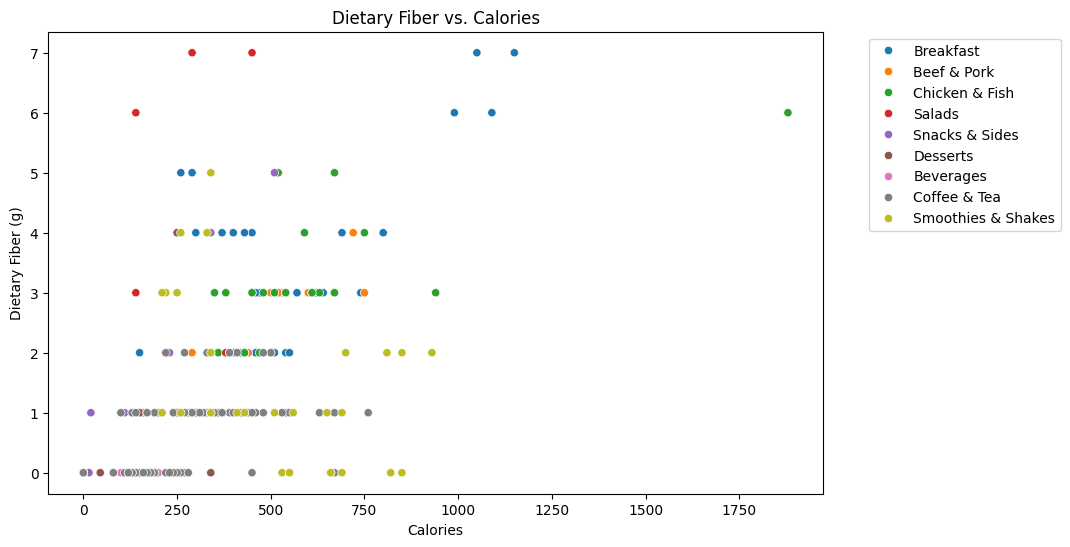

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot to compare Dietary Fiber vs. Calories for all items
sns.scatterplot(x='Calories', y='Dietary Fiber', hue='Category', data=data)
plt.title('Dietary Fiber vs. Calories')
plt.xlabel('Calories')
plt.ylabel('Dietary Fiber (g)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

This scatter plot visualizes the relationship between dietary fiber content and calories across different menu items and categories. Items with higher dietary fiber and lower calories are ideal choices for consumers focusing on fiber intake and overall calorie management. Marketers can highlight high-fiber items, while product developers can work on enhancing fiber content in menu offerings.

In [ ]:
# Filter items with lower calories and higher dietary fiber
ideal_choices = data[(data['Calories'] < 400) & (data['Dietary Fiber'] > 4)]

# Display the filtered items
ideal_choices[['Item', 'Category', 'Calories', 'Dietary Fiber']]

,Item,Category,Calories,Dietary Fiber
40,Fruit & Maple Oatmeal,Breakfast,290,5
41,Fruit & Maple Oatmeal without Brown Sugar,Breakfast,260,5
87,Premium Southwest Salad (without Chicken),Salads,140,6
89,Premium Southwest Salad with Grilled Chicken,Salads,290,7
234,Blueberry Pomegranate Smoothie (Large),Smoothies & Shakes,340,5


Based on a scatter plot visualizing dietary fiber vs. calories across McDonald's menu items, items that appear in the lower left quadrant of the plot (lower calories and higher dietary fiber) are considered ideal choices for consumers focused on healthier options. These products offer a good balance between lower calorie content while providing higher levels of dietary fiber, which is beneficial for digestive health and overall well-being. Therefore, the criteria for having lower calories (<400) and higher dietary fiber (> 4 grams) were determined as the ideal choice. And here it is:

### Question 7: Which menu items at McDonald's have the highest levels of cholesterol, saturated fat, sodium, and trans fat?

In [ ]:
# Most unhealthy food
data.sort_values(['Cholesterol','Saturated Fat','Sodium','Trans Fat'], ascending=False).head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Serving Size (g),Calories per Gram
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),15.3 oz (434 g),1150,540,60.0,93,20.0,100,0.0,...,7,28,17,36,15,2,30,40,15.0,76.666667
31,Breakfast,Big Breakfast with Hotcakes (Regular Biscuit),14.8 oz (420 g),1090,510,56.0,87,19.0,96,0.0,...,6,23,17,36,15,2,25,40,14.0,77.857143
28,Breakfast,Big Breakfast (Large Biscuit),10 oz (283 g),800,470,52.0,80,18.0,90,0.0,...,4,17,3,28,15,2,15,30,10.0,80.000000
27,Breakfast,Big Breakfast (Regular Biscuit),9.5 oz (269 g),740,430,48.0,73,17.0,87,0.0,...,3,12,3,28,15,2,15,25,9.0,82.222222
5,Breakfast,Steak & Egg McMuffin,6.5 oz (185 g),430,210,23.0,36,9.0,46,1.0,...,4,18,3,26,15,2,30,20,6.0,71.666667


The observation that most of the menu items with high levels of cholesterol, saturated fat, sodium, and trans fat come from the breakfast category can be explained by the typical composition and preparation methods of breakfast foods offered by McDonald's. Here are several reasons why breakfast items tend to be higher in these nutritional risk factors:

1. **Ingredients**: Breakfast items often include ingredients like eggs, cheese, sausage, and bacon. These ingredients are naturally higher in cholesterol and saturated fat.

2. **Preparation Methods**: Many breakfast items are fried or cooked in butter or oil, increasing their fat content, including trans fats if partially hydrogenated oils are used.

3. **Portion Sizes**: Breakfast meals like the "Big Breakfast" tend to be larger and include multiple high-fat components (e.g., eggs, sausage, hash browns), leading to higher overall levels of cholesterol, saturated fat, and sodium.

4. **Sodium Content**: Processed meats like bacon and sausage, commonly found in breakfast items, are typically high in sodium due to the curing process and added preservatives.

5. **Cheese and Condiments**: Many breakfast sandwiches and platters include cheese and condiments, which contribute additional saturated fat and sodium.

**Health Implications**
1. **Increased Risk**: Regular consumption of foods high in cholesterol, saturated fat, and sodium is associated with an increased risk of cardiovascular diseases, hypertension, and other health issues.

2. **Dietary Balance**: Understanding which items are highest in these nutrients can help consumers balance their diets by choosing healthier options or limiting the frequency of consuming such items.

**Conclusion**

The breakfast category at McDonald's includes many items with high levels of cholesterol, saturated fat, sodium, and trans fat due to the ingredients used, preparation methods, and portion sizes typical of breakfast foods. By being aware of these factors, consumers can make more informed dietary choices, potentially opting for menu items that are lower in these nutrients to promote better health.

### **4. Feature Engineering**

In [ ]:
# Calculate Fat to Calorie Ratio
data['Fat to Calorie Ratio'] = data['Total Fat'] / data['Calories']
data

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),Serving Size (g),Calories per Gram,Fat to Calorie Ratio
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,17,3,17,10,0,25,15,4.0,75.000000,0.043333
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,17,3,18,6,0,25,8,4.0,62.500000,0.032000
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,17,2,14,8,0,25,10,3.0,123.333333,0.062162
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,17,2,21,15,0,30,15,5.0,90.000000,0.062222
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,17,2,21,6,0,25,10,5.0,80.000000,0.057500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,4,64,12,15,0,40,8,10.0,51.000000,0.033333
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,5,85,15,20,0,50,10,13.0,53.076923,0.033333
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,2,43,8,10,0,25,6,6.0,56.666667,0.032353
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,9,103,21,20,0,60,6,14.0,57.857143,0.039506


### **5. Statistical Analysis**

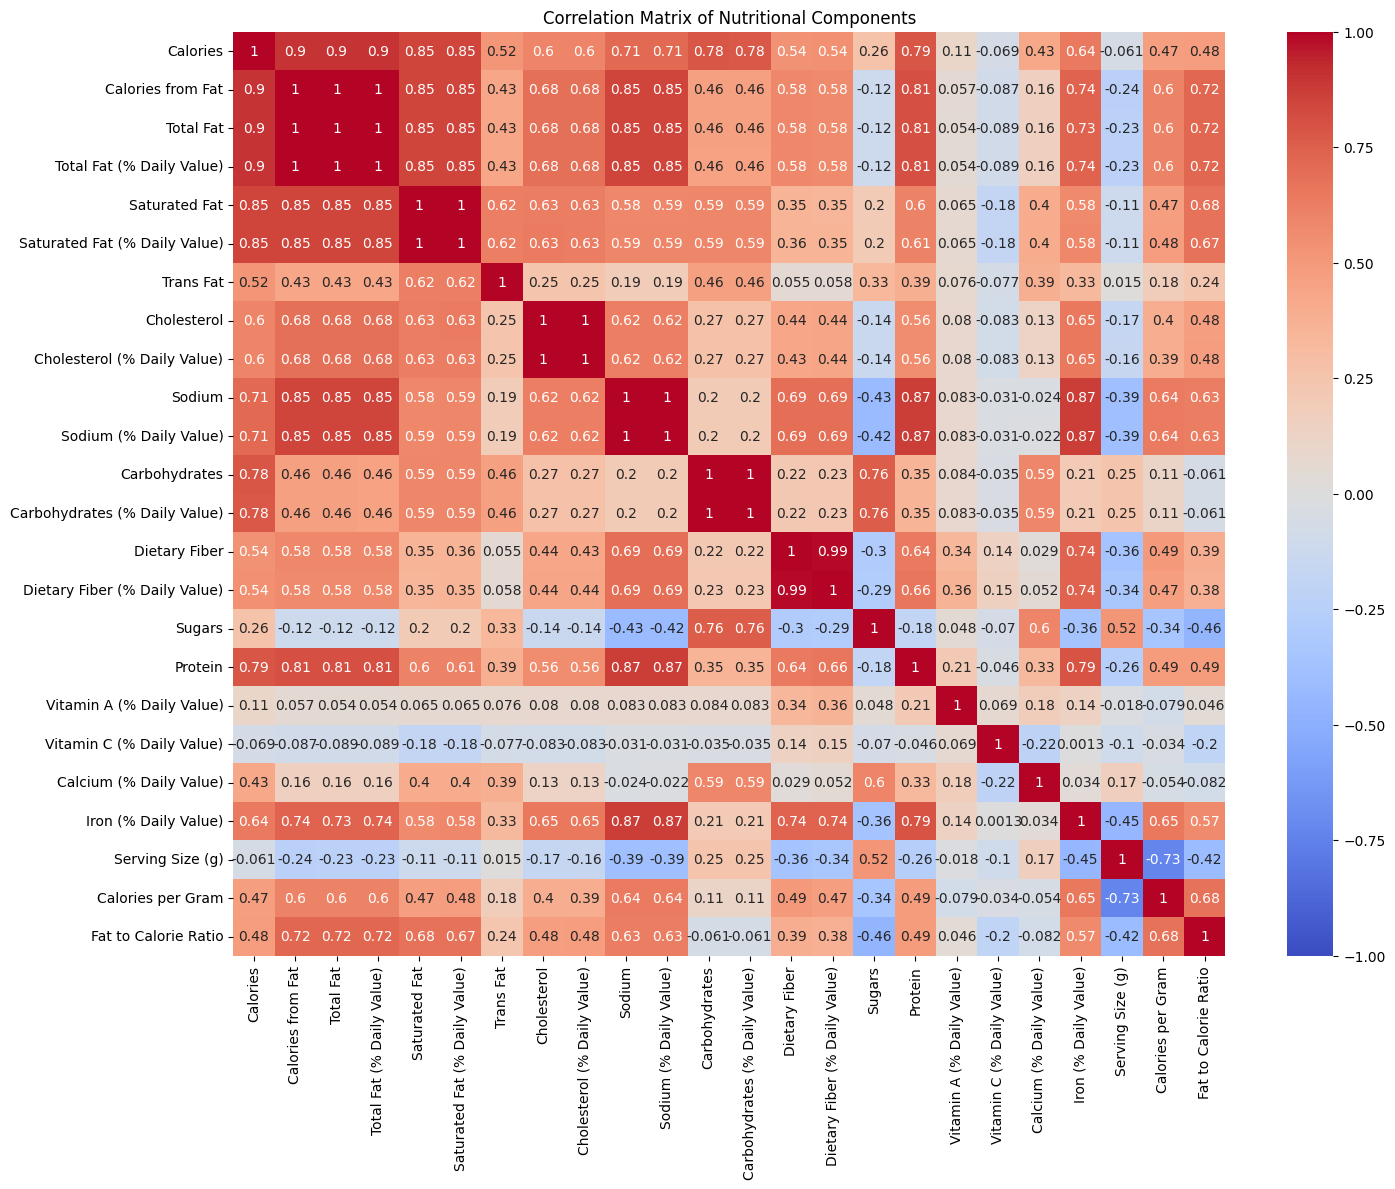

In [ ]:
# Exclude non-numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include=[float, int]).columns

# Compute correlation matrix for numeric columns
correlation_matrix = data[numeric_columns].corr()

# Visualize correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Nutritional Components')
plt.show()

### **6. Modeling**

### Decision Tree, Random Forest, KNN

In [ ]:
# For example, let's predict if an item is Breakfast based on Calories and Total Fat
# You can choose other targets and features as per your analysis goals
X = data[['Calories', 'Total Fat']]
y = data['Category'] == 'Breakfast'  # Binary target: True if Breakfast, False otherwise

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Model training
# Decision Tree
dt_model.fit(X_train, y_train)

# Random Forest
rf_model.fit(X_train, y_train)

# KNN
knn_model.fit(X_train, y_train)

# Model evaluation
models = [('Decision Tree', dt_model), ('Random Forest', rf_model), ('KNN', knn_model)]

for model_name, model in models:
    # Model evaluation
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)

    # Print model name
    print(f"{model_name} Classification Report:")
    print(report)

    # Extract and print metrics (accuracy, precision, recall, f1-score)
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report_dict['accuracy']
    precision = report_dict['weighted avg']['precision']
    recall = report_dict['weighted avg']['recall']
    f1_score = report_dict['weighted avg']['f1-score']

    print(f"{model_name} Metrics")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1_score:.2f}")
    print()

Decision Tree Classification Report:
              precision    recall  f1-score   support

       False       0.93      1.00      0.97        42
        True       1.00      0.70      0.82        10

    accuracy                           0.94        52
   macro avg       0.97      0.85      0.89        52
weighted avg       0.95      0.94      0.94        52

Decision Tree Metrics
Accuracy: 0.94
Precision: 0.95
Recall: 0.94
F1-score: 0.94

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.89      1.00      0.94        42
        True       1.00      0.50      0.67        10

    accuracy                           0.90        52
   macro avg       0.95      0.75      0.81        52
weighted avg       0.91      0.90      0.89        52

Random Forest Metrics
Accuracy: 0.90
Precision: 0.91
Recall: 0.90
F1-score: 0.89

KNN Classification Report:
              precision    recall  f1-score   support

       False       0.85   

### **7. Evaluation**

### Confusion Matrix

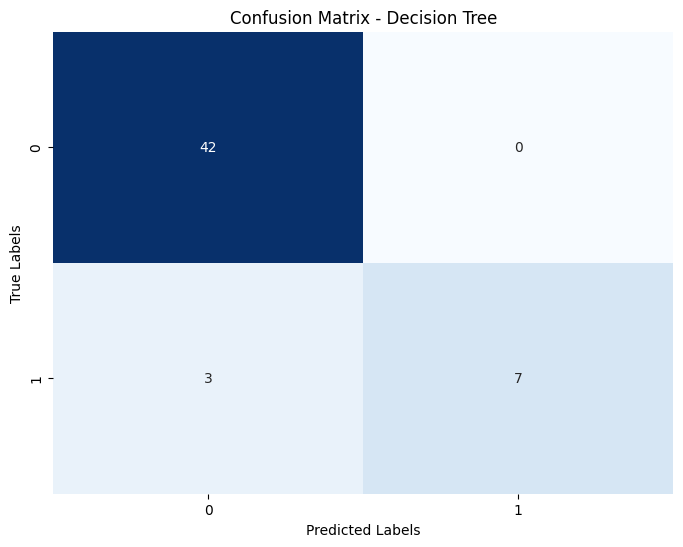

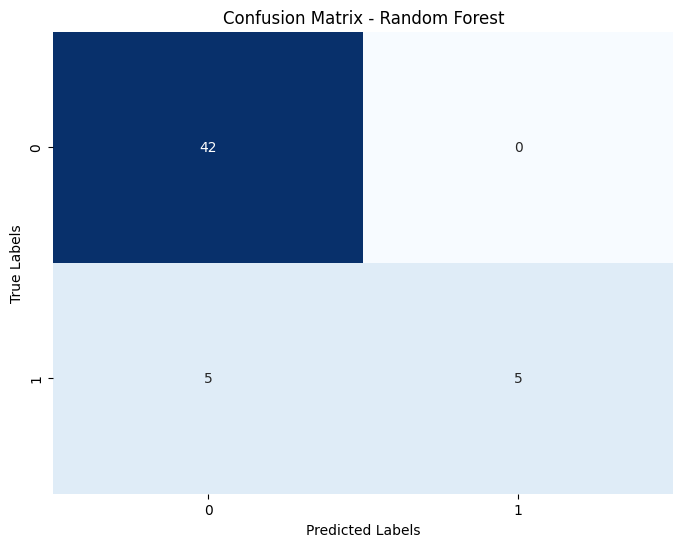

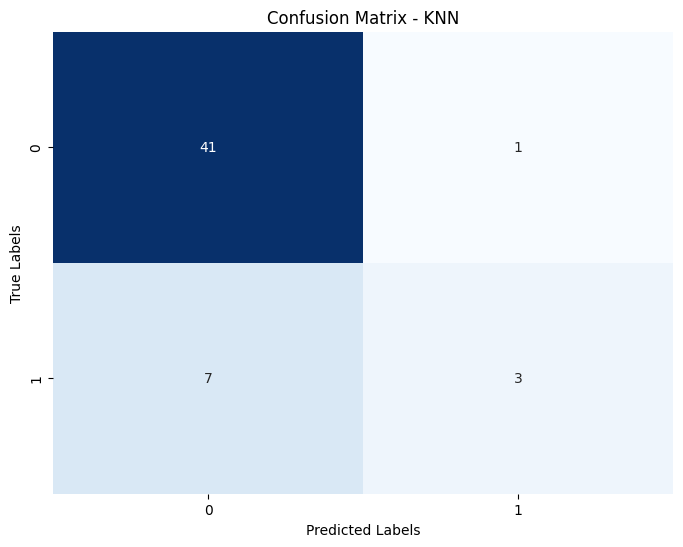

In [ ]:
# Model evaluation
models = [('Decision Tree', dt_model), ('Random Forest', rf_model), ('KNN', knn_model)]

for model_name, model in models:
    # Model evaluation
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plotting confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

In summary, the Decision Tree model demonstrates the highest performance metrics. It balances accuracy, interpretability, and efficiency effectively. Random Forest still performing well, shows slightly lower metrics compared to the Decision Tree. KNN, on the other hand, still be useful in situations where interpretability and simplicity are important.